In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=dc80d3fcc213ded77fb7091f43e9f402bd9b11c7eb35b54999a7dc98e4846b18
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


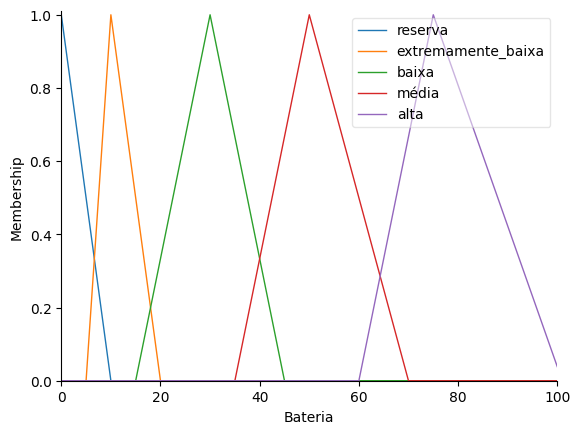

In [ ]:
import skfuzzy as fuz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

universe = universe = np.linspace(0, 101, 5)

Bateria = ctrl.Antecedent(np.arange(0, 101, 1), 'Bateria')

Bateria['reserva'] = fuz.trimf(Bateria.universe, [0,0,10])
Bateria['extremamente_baixa'] = fuz.trimf(Bateria.universe, [5,10,20])
Bateria['baixa'] = fuz.trimf(Bateria.universe, [15,30,45])
Bateria['média'] = fuz.trimf(Bateria.universe, [35,50,70])
Bateria['alta'] = fuz.trimf(Bateria.universe, [60,75,101])

TaxaDeAcerto = ctrl.Antecedent(np.arange(0,101,1), 'TaxaDeAcerto')

TaxaDeAcerto['baixíssima'] = fuz.trimf(TaxaDeAcerto.universe, [0,10,20])
TaxaDeAcerto['baixa'] = fuz.trimf(TaxaDeAcerto.universe, [10,30,50])
TaxaDeAcerto['aceitável'] = fuz.trimf(TaxaDeAcerto.universe, [40,55,80])
TaxaDeAcerto['alta'] = fuz.trimf(TaxaDeAcerto.universe, [70,90,101])

GPRS = ctrl.Consequent(np.arange(0,101,1), 'GPRS')

GPRS['Liga'] = fuz.trimf(GPRS.universe, [0,33,66])
GPRS['NãoLiga'] = fuz.trimf(GPRS.universe, [33,66,101])

regras1_1 = ctrl.Rule(Bateria['reserva'] & TaxaDeAcerto['alta'], GPRS['NãoLiga'])
regras1_2 = ctrl.Rule(Bateria['reserva'] & TaxaDeAcerto['aceitável'], GPRS['NãoLiga'])
regras1_3 = ctrl.Rule(Bateria['reserva'] & TaxaDeAcerto['baixa'], GPRS['NãoLiga'])
regras1_4 = ctrl.Rule(Bateria['reserva'] & TaxaDeAcerto['baixíssima'], GPRS['NãoLiga'])

regras2_1 = ctrl.Rule(Bateria['extremamente_baixa'] & TaxaDeAcerto['alta'], GPRS['Liga'])
regras2_2 = ctrl.Rule(Bateria['extremamente_baixa'] & TaxaDeAcerto['aceitável'], GPRS['Liga'])
regras2_3 = ctrl.Rule(Bateria['extremamente_baixa'] & TaxaDeAcerto['baixa'], GPRS['NãoLiga'])
regras2_4 = ctrl.Rule(Bateria['extremamente_baixa'] & TaxaDeAcerto['baixíssima'], GPRS['NãoLiga'])

regras3_1 = ctrl.Rule(Bateria['baixa'] & TaxaDeAcerto['alta'], GPRS['Liga'])
regras3_2 = ctrl.Rule(Bateria['baixa'] & TaxaDeAcerto['aceitável'], GPRS['Liga'])
regras3_3 = ctrl.Rule(Bateria['baixa'] & TaxaDeAcerto['baixa'], GPRS['NãoLiga'])
regras3_4 = ctrl.Rule(Bateria['baixa'] & TaxaDeAcerto['baixíssima'], GPRS['NãoLiga'])

regras4_1 = ctrl.Rule(Bateria['média'] & TaxaDeAcerto['alta'], GPRS['Liga'])
regras4_2 = ctrl.Rule(Bateria['média'] & TaxaDeAcerto['aceitável'], GPRS['Liga'])
regras4_3 = ctrl.Rule(Bateria['média'] & TaxaDeAcerto['baixa'], GPRS['Liga'])
regras4_4 = ctrl.Rule(Bateria['média'] & TaxaDeAcerto['baixíssima'], GPRS['NãoLiga'])

regras5_1 = ctrl.Rule(Bateria['alta'] & TaxaDeAcerto['alta'], GPRS['Liga'])
regras5_2 = ctrl.Rule(Bateria['alta'] & TaxaDeAcerto['aceitável'], GPRS['Liga'])
regras5_3 = ctrl.Rule(Bateria['alta'] & TaxaDeAcerto['baixa'], GPRS['Liga'])
regras5_4 = ctrl.Rule(Bateria['alta'] & TaxaDeAcerto['baixíssima'], GPRS['NãoLiga'])

regras6_1 = ctrl.Rule(Bateria['alta'] | Bateria['média'] | Bateria['baixa'] | Bateria['extremamente_baixa'], GPRS['Liga'])
regras6_2 = ctrl.Rule(Bateria['reserva'], GPRS['NãoLiga'])

regras7_1 = ctrl.Rule(TaxaDeAcerto['baixíssima'] | TaxaDeAcerto['baixa'], GPRS['NãoLiga'])
regras7_2 = ctrl.Rule(TaxaDeAcerto['aceitável'] | TaxaDeAcerto['alta'], GPRS['Liga'])

Bateria.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

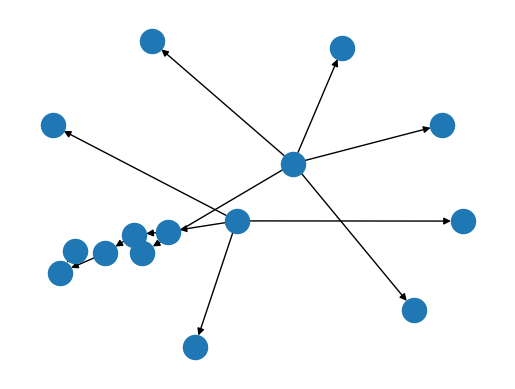

In [ ]:
controlador = ctrl.ControlSystem([regras1_1,
                                  regras1_2,
                                  regras1_3,
                                  regras1_4,
                                  regras2_1,
                                  regras2_2,
                                  regras2_3,
                                  regras2_4,
                                  regras3_1,
                                  regras3_2,
                                  regras3_3,
                                  regras3_4,
                                  regras4_1,
                                  regras4_2,
                                  regras4_3,
                                  regras4_4,
                                  regras5_1,
                                  regras5_2,
                                  regras5_3,
                                  regras6_1,
                                  regras6_2,
                                  regras7_1,
                                  regras7_2])


GPRS_acionamento = ctrl.ControlSystemSimulation(controlador)
regras1_4.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

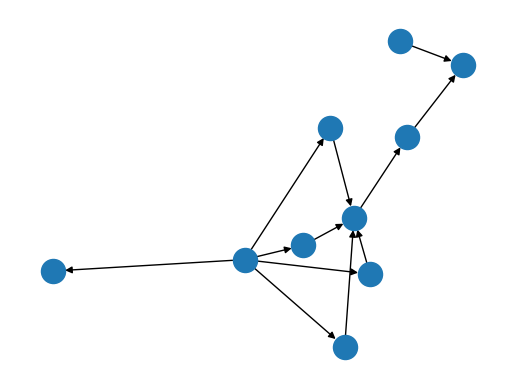

In [ ]:
regras6_1.view()

In [ ]:
# GPRS_acionamento.compute()
# print(GPRS_acionamento.output['GPRS'])
# GPRS.view(sim=GPRS_acionamento)

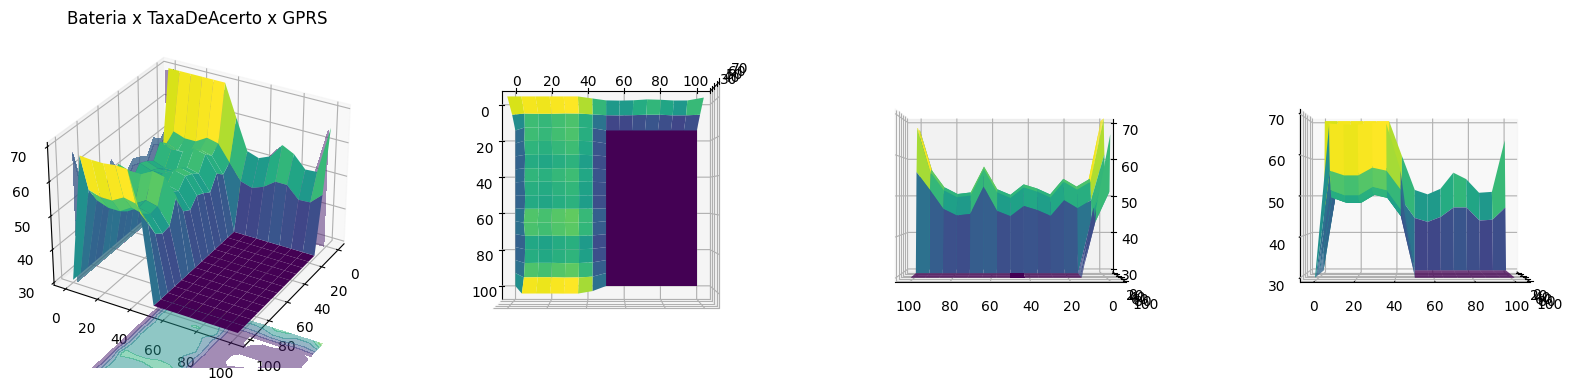

In [ ]:
upsampled = np.linspace(0, 100, 15)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

# Loop through the system 21*21 times to collect the control surface
for i in range(15):
    for j in range(15):
        GPRS_acionamento.input['Bateria'] = x[i, j]
        GPRS_acionamento.input['TaxaDeAcerto'] = y[i, j]
        GPRS_acionamento.compute()
        z[i, j] = GPRS_acionamento.output['GPRS']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(141, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(30, 30)

plt.title('Bateria x TaxaDeAcerto x GPRS')

ax = fig.add_subplot(142, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)
ax.view_init(90, 0, 0)
plt.title('')


ax = fig.add_subplot(143, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)
ax.view_init(0, 90, 0)

ax = fig.add_subplot(144, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)
ax.view_init(0, 0, 0)

